<a href="https://colab.research.google.com/github/Abimaleh/data-science-portfolio/blob/Analise-exploratoria-de-vendas/AEV_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-73981426.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["data_venda"] = pd.to_datetime(df["data_venda"], errors = "coerce", utc=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   ano          558837 non-null  int64              
 1   fabricante   548536 non-null  object             
 2   modelo       548438 non-null  object             
 3   cor          558088 non-null  object             
 4   preco_venda  558825 non-null  float64            
 5   data_venda   558799 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 25.6+ MB


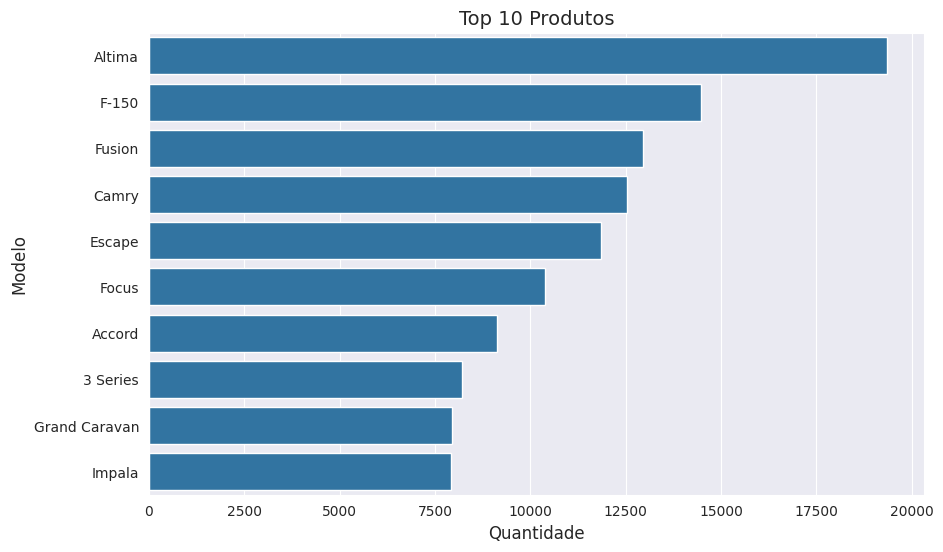

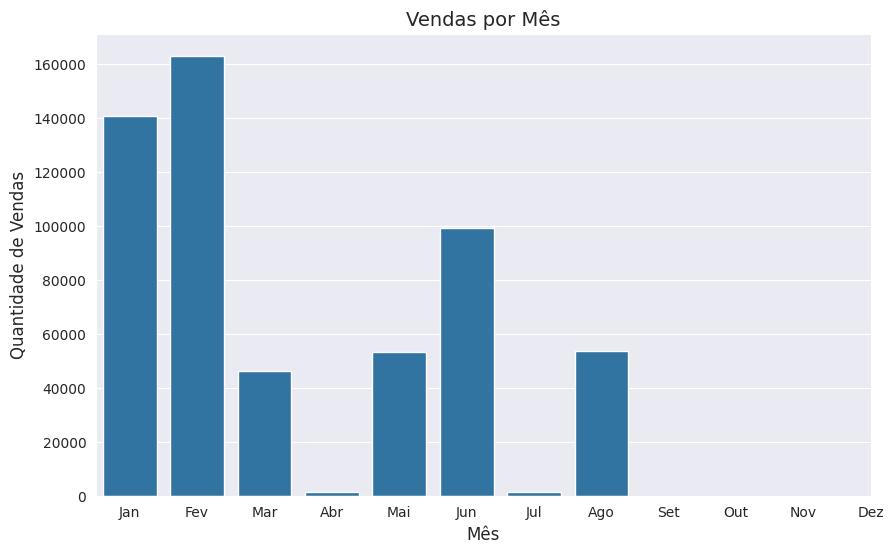

In [70]:
#1. importação das bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configurações de visualização
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

#2. carregando o dataset
df = pd.read_csv("car_prices.csv")
df.head()

#3. tratamento de dados
colunas_usadas = ["year", "make", "model", "color", "sellingprice", "saledate"]
df = df[colunas_usadas]
df.rename(columns={
    "year": "ano",
    "make": "fabricante",
    "model": "modelo",
    "color": "cor",
    "sellingprice": "preco_venda",
    "saledate": "data_venda"
    }, inplace=True)
df["data_venda"] = pd.to_datetime(df["data_venda"], errors = "coerce", utc=True)
df["data_venda"] = df["data_venda"].dt.normalize()

#3. exploração inicial
df.info()
df.describe()
df.isnull().sum()

#4. analise e visualizações
#produtos mais vendidos
top_produtos = df["modelo"].value_counts().head(10)
sns.barplot(x=top_produtos.values, y=top_produtos.index)
plt.title("Top 10 Produtos", fontsize=14)
plt.xlabel("Quantidade", fontsize=12)
plt.ylabel("Modelo", fontsize=12)
plt.show()

#vendas por mes
df_cleaned = df.dropna(subset=["data_venda"]).copy()
df_cleaned["mes_venda"] = df_cleaned["data_venda"].dt.month
vendas_por_mes = df_cleaned["mes_venda"].value_counts().sort_index()
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
sns.barplot(x=vendas_por_mes.index, y=vendas_por_mes.values)
plt.xticks(ticks = range(0, 12), labels=meses)
plt.title("Vendas por Mês", fontsize=14)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.show()

#preço medio por fabricante
